In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import  scipy.integrate as inte
%matplotlib inline

# RK4 Code

In [125]:
def RK42D (deriv, tRange, dt, x0, v0, tol=10e-10, Debug = False):
    t0 = tRange[0]
    tf = tRange[1]
    resultsX = []
    resultsV = []
    resultsDT = []

    times = []
    x = x0
    v = v0

    resultsX.append(x)
    resultsV.append(v)
    dx = []
    dv = []
    resultsX.append(x)
    resultsV.append(v)
    t = t0
    times.append(t)
    resultsDT.append(dt)
    
    while t < tf:
        
        i = 0
        if Debug:
            print("Step number: "+str(len(times))+" with initial time step "+str(dt)+" at time: "+str(t)+".")
            print("----------------------------------------------")
        while i < 10e1:
            NeedNextStep = False
            if tol != None:
                #Run at half Time Step: 

                #Half Step variables:
                xHalf = x 
                vHalf = v
                # First half step
                k1 = 0.5*dt*deriv(x, v)
                k2 = 0.5*dt*deriv(x + k1[0]/2.0,v + k1[1]/2.0)
                k3 = 0.5*dt*deriv(x + k2[0]/2.0, v + k2[1]/2.0)
                k4 = 0.5*dt*deriv(x + k3[1], v + k3[1])
                xHalf += k1[0]/6. + k2[0]/3. + k3[0]/3. + k4[0]/6.
                vHalf += k1[1]/6. + k2[1]/3. + k3[1]/3. + k4[1]/6.

                #Second half step
                k1 = 0.5*dt*deriv(xHalf, vHalf)
                k2 = 0.5*dt*deriv(xHalf + k1[0]/2.0,vHalf + k1[1]/2.0)
                k3 = 0.5*dt*deriv(xHalf + k2[0]/2.0, vHalf + k2[1]/2.0)
                k4 = 0.5*dt*deriv(xHalf + k3[1], vHalf + k3[1])
                xHalf += k1[0]/6. + k2[0]/3. + k3[0]/3. + k4[0]/6.
                vHalf += k1[1]/6. + k2[1]/3. + k3[1]/3. + k4[1]/6.

            xFull = x
            vFull = v
            # Full Time Step: Saves this one!
            k1 = dt*deriv(xFull, v)
            k2 = dt*deriv(xFull + k1[0]/2.0,vFull + k1[1]/2.0)
            k3 = dt*deriv(xFull + k2[0]/2.0, vFull + k2[1]/2.0)
            k4 = dt*deriv(xFull + k3[1], vFull + k3[1])
            xFull += k1[0]/6. + k2[0]/3. + k3[0]/3. + k4[0]/6.
            vFull += k1[1]/6. + k2[1]/3. + k3[1]/3. + k4[1]/6.
 

            if tol == None:
                break
            

            xDif = np.abs(xHalf-xFull)
            vDif = np.abs(vHalf-vFull)
            if Debug:
                print("Iteration number: "+str(i))
                print("x = "+str(xFull)+", v = "+str(vFull))
                print("xHalf = "+str(xHalf)+", vHalf = "+str(vHalf))
                print("x Difference: " + str(xDif)+" and v Difference: "+str(vDif))
                
            if (xDif/tol > 1.) or (vDif/tol > 1.):
                dt = 0.1*dt
                NeedNextStep = True
                if Debug:
                    print("Lower")

            if (xDif/tol < tol*10e-1) and (vDif/tol < tol*10e-1) and xDif != 0 and vDif!=0:
                dt = 10*dt
                NeedNextStep = True
                if Debug:
                    print("Raise")
            
            if Debug:
                 print("................\n")
            
            if not NeedNextStep:
                break
            
            i+= 1
        
        x = xFull
        v = vFull
        resultsX.append(x)
        resultsV.append(v)
        dx.append((k1[0] + k2[0] + k3[0] + k4[0])/dt)
        dv.append((k1[1] + k2[1] + k3[1] + k4[1])/dt)
        t += dt
  
        times.append(t)
        resultsDT.append(dt)

        
        

        if Debug:
            print ("New dt: "+str(dt))
            print("Next step \n=====================================================================\n")
        
    return [np.array(times), np.array(resultsX), np.array(resultsV), np.array(dx), np.array(dv), np.array(resultsDT)]

# Flow Map Generators


In [131]:
def FlowMap2D(Integrator, deriv,T, x0arr, v0arr, args = [], xlim = [0,0],\
              ylim = [0,0],lw = 1, tol = 10e-10,color = False, PlotTimeSteps = False, starting = False, save = False, log = False, Axis = False, VF = False):
    x1, x2 = xlim[0], xlim[1]
    y1, y2 = ylim[0], ylim[1]
    t0 = T[0]
    tf = T[1]
    dt = T[2]
    rX = []
    rV = []
    dx = []
    dv = []
    dT = []
    times = []
    for i in x0arr:
        for j in v0arr:
            results = Integrator(deriv, [t0,tf], dt, i, j, tol = tol)
            times.append(results[0])
            rX.append(results[1])
            rV.append(results[2])
            dx.append(results[3])
            dv.append(results[4])
            dT.append(results[5])
            
    rtimes = np.array(times)
    rXarr = np.array(rX)
    rVarr = np.array(rV)
    rdx = np.array(dx)
    rdv = np.array(dv)
    rdt = np.array(dT)
    plt.figure()
    
    colormap = cm.rainbow(np.linspace(0,1,len(rXarr)))
    
    if type(color) == str:
        for i in range(len(rXarr)):
                plt.plot(rXarr[i], rVarr[i], color = color, lw = lw)
                if starting:
                    plt.plot(rXarr[i][0], rVarr[i][0], "." ,color = "black", ms = 5)
                
    if type(color) != str:
        for i in range(len(rXarr)):
                plt.plot(rXarr[i], rVarr[i], color = colormap[i],lw = lw)
                if starting:
                    plt.plot(rXarr[i][0], rVarr[i][0], "." ,color = colormap[i], ms = 5)
    
    if type(VF) == int:
         for i in range(len(rXarr)):
            n = int(len(rXarr[i]) * (100-VF) / 100)
            plt.quiver(rXarr[i][0::n], rVarr[i][0::n],rdx[i][0::n], rdv[i][0::n], pivot = "mid")
            
            
    #print len(results)
    if x1!= 0 or x2 != 0:
            plt.xlim(x1,x2)
    if y1 != 0 or y2 != 0:
            plt.ylim( ymin = y1, ymax = y2)
    plt.xlabel("x")
    plt.ylabel("y")
    
    if type(log) == bool and log:
        plt.xscale("log")
        plt.yscale("log")

    if save != False:
        plt.savefig(save)
        
    if Axis != False:
        plt.axis(Axis)
        
 
            
    plt.show()
    
    if PlotTimeSteps:
        for i in range(len(rdt)):
            plt.plot(rtimes[i], rdt[i], color=colormap[i], lw=lw)
        plt.xlabel("Time")
        plt.ylabel("dt")
        plt.yscale("log")
        plt.show()

    
def FlowMap2DPolar(Integrator, deriv,T, x0arr, v0arr, args = [], xlim = [0,0], ylim = [0,0],lw = 1,\
                   color = False, PlotTimeSteps = False, starting = False, save = False, log = False, Axis = False, VF = False):
    x1, x2 = xlim[0], xlim[1]
    y1, y2 = ylim[0], ylim[1]
    t0 = T[0]
    tf = T[1]
    dt = T[2]
    rX = []
    rV = []
    dx = []
    dv = []
    for i in x0arr:
        for j in v0arr:
            results =  Integrator(deriv, [t0,tf], dt, i, j, args)
            rX.append(results[1])
            rV.append(results[2])
            dx.append(results[3])
            dv.append(results[4])
    rXarr = np.array(rX)
    rVarr = np.array(rV)
    rdx = np.array(dx)
    rdv = np.array(dv)
    plt.figure()
    
    colormap = cm.rainbow(np.linspace(0,1,len(rXarr)))
    
    if type(color) == str:
        for i in range(len(rXarr)):
                plt.plot(rXarr[i]*np.cos(rVarr[i]),rXarr[i]*np.sin(rVarr[i]), color = color, lw = lw)
                if starting:
                    plt.plot(rXarr[i][0]*np.cos(rVarr[i][0]),rXarr[i][0]*np.sin(rVarr[i][0]) , "." ,color = "black", ms = 5)
                
    if type(color) != str:
        for i in range(len(rXarr)):
                plt.plot(rXarr[i]*np.cos(rVarr[i]),rXarr[i]*np.sin(rVarr[i]), color = colormap[i],lw = lw)
                if starting:
                    plt.plot(rXarr[i][0]*np.cos(rVarr[i][0]),rXarr[i][0]*np.sin(rVarr[i][0]), "." ,color = colormap[i], ms = 5)
                    

    if type(VF) == int:
         for i in range(len(rXarr)):
            n = int(len(rXarr[i]) * (100-VF) / 100)
            plt.quiver(rXarr[i][0::n]*np.cos(rVarr[i][0::n]),rXarr[i][0::n]*np.sin(rVarr[i][0::n]),\
                       rdx[i][0::n]*np.cos(rVarr[i][0::n])-rXarr[i][0::n]*np.sin(rVarr[i][0::n])*rdv[i][0::n],\
                        rdx[i][0::n]*np.sin(rVarr[i][0::n])+rXarr[i][0::n]*np.cos(rVarr[i][0::n])*rdv[i][0::n], pivot = "mid")

            
    print (len(results))
    if x1!= 0 or x2 != 0:
            plt.xlim(x1,x2)
    if y1 != 0 or y2 != 0:
            plt.ylim( ymin = y1, ymax = y2)
    plt.xlabel("x(t)")
    plt.ylabel("x'(t)")
    
    if type(log) == bool and log:
        plt.xscale("log")
        plt.yscale("log")

    if save != False:
        plt.savefig(save)
        
    if Axis != False:
        plt.axis(Axis)
    
    if PlotTimeSteps:
        for i in range(len(rdt)):
            plt.plot(rtimes[i], rdt[i], color=colormap[i], lw=lw)
        plt.xlabel("Time")
        plt.ylabel("dt")
        plt.show()
 
            
    plt.show()

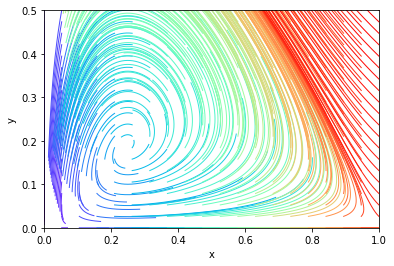

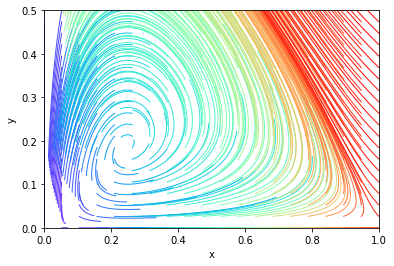

In [154]:
def Test(x, y):
    dx = x**2 * ( 1-x) - x*y
    dy = x*y - y*0.25
    return np.array([dx, dy])

FlowMap2D(RK42D, Test, [0,5,0.001], np.linspace(0,1,20), np.linspace(0,.5,20),\
            xlim = [0,1], ylim = [0,0.5], tol = None)


FlowMap2D(RK42D, Test, [0,5,0.001], np.linspace(0,1,20), np.linspace(0,0.5,20),\
            xlim = [0,1], ylim = [0,0.5], tol = 10e-5)
